# CS 513 B – KDD PROJECT 

## Project Group No: 1

## Forecasting Cancellation Flags: A Data-driven Approach to Hotel Reservation Cancellation Prediction

Problem Statement:
The high rate of cancella/ons and no-shows in online hotel reserva/ons has become a challenge for hotels as it impacts their revenue and occupancy rates. While customers benefit from the flexibility of free or low-cost cancella/ons, hotels have to deal with the revenue-diminishing effect of empty rooms. Hence, there is a need to explore strategies that can help hotels reduce cancella/ons and no-shows while maintaining customer sa/sfac/on and loyalty. Therefore, the problem at hand is to predict the cancella-on flag of a hotel booking based on a set of features, in order to assist hotels in managing their resources and revenue more efficiently.

Source of Dataset: https://www.kaggle.com/datasets/naveenrenji/hotel-resource-management-dataset

Team Members: Group 1
1. Naveen Mathews Renji
2. Aatish Kayyath
3. Madhura Shinde
4. Abhishek Kocharekar

## Importing Libraries

In [45]:
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from scipy import stats
import os
import sys
import time

# Importing libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
from sklearn.tree import plot_tree

# Importing libraries for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Automated Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

## Loading the dataset

In [46]:
df = pd.read_csv("Hotel-Reservations.csv")

In [47]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [48]:
# Print the ammount of rows and columns in the dataframe
rows, cols = df.shape
print(f"SHAPE BREAKDOWN\n{rows} rows and {cols} columns")


# Show the names of each column in the dataframe
print("\nCOLUMN BREAKDOWN")
print(df.columns)

print("\nFIRST 15 ROWS")
df.head(15)

SHAPE BREAKDOWN
36275 rows and 19 columns

COLUMN BREAKDOWN
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

FIRST 15 ROWS


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [49]:
print("UNIQUE VALUES IN EACH COLUMN\n")
df.nunique()

UNIQUE VALUES IN EACH COLUMN



Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

## Pre-processing the Data

In [50]:
# Finding the number of numerical and non-numerical columns
print("PRE CONVERSION\n Number of numerical columns: {}".format(df.select_dtypes(include=np.number).shape[1]))
print("\nPRE CONVERSION\n Number of non-numerical columns: {}".format(df.select_dtypes(exclude=np.number).shape[1]))

PRE CONVERSION
 Number of numerical columns: 14

PRE CONVERSION
 Number of non-numerical columns: 5


In [51]:
# Drop the "Booking_ID" column
df.drop("Booking_ID", axis=1, inplace=True)
print("- Dropped 'Booking_ID' column")

# Define a dictionary of replacements to be made in the dataframe
replacements = {
    "booking_status": {"Not_Canceled": 0, "Canceled": 1},
    "type_of_meal_plan": {"Not Selected": 0, "Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3": 3},
    "room_type_reserved": {"Room_Type 1": 1, "Room_Type 2": 2, "Room_Type 3": 3, "Room_Type 4": 4, "Room_Type 5": 5, "Room_Type 6": 6, "Room_Type 7": 7},
    "market_segment_type": {"Offline": 0, "Online": 1, "Corporate": 2, "Aviation": 3, "Complementary": 4}
}

# Replace values in the dataframe using the dictionary
df.replace(replacements, inplace=True)

# Show number of numerical and non-numerical columns in the dataframe
print("\nPOST CONVERSION\n Number of numerical columns: {}".format(df.select_dtypes(include=np.number).shape[1]))
print("\nPOST CONVERSION\n Number of non-numerical columns: {}".format(df.select_dtypes(exclude=np.number).shape[1]))

- Dropped 'Booking_ID' column

POST CONVERSION
 Number of numerical columns: 18

POST CONVERSION
 Number of non-numerical columns: 0


In [54]:
# Convert all values to numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [53]:
print("\nFIRST 15 ROWS")
df.head(10)


FIRST 15 ROWS


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1
5,2,0,0,2,2,0,1,346,2018,9,13,1,0,0,0,115.00,1,1
6,2,0,1,3,1,0,1,34,2017,10,15,1,0,0,0,107.55,1,0
7,2,0,1,3,1,0,4,83,2018,12,26,1,0,0,0,105.61,1,0
8,3,0,0,4,1,0,1,121,2018,7,6,0,0,0,0,96.90,1,0
9,2,0,0,5,1,0,4,44,2018,10,18,1,0,0,0,133.44,3,0


## Checking for missing values

In [56]:
print("Total missing values is {}".format(df.isnull().sum().sum()))
print("\nMissing values by column is as follows:")
df.isnull().sum()

Total missing values is 0

Missing values by column is as follows:


no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## EDA - Pearson Correlation Heatmap

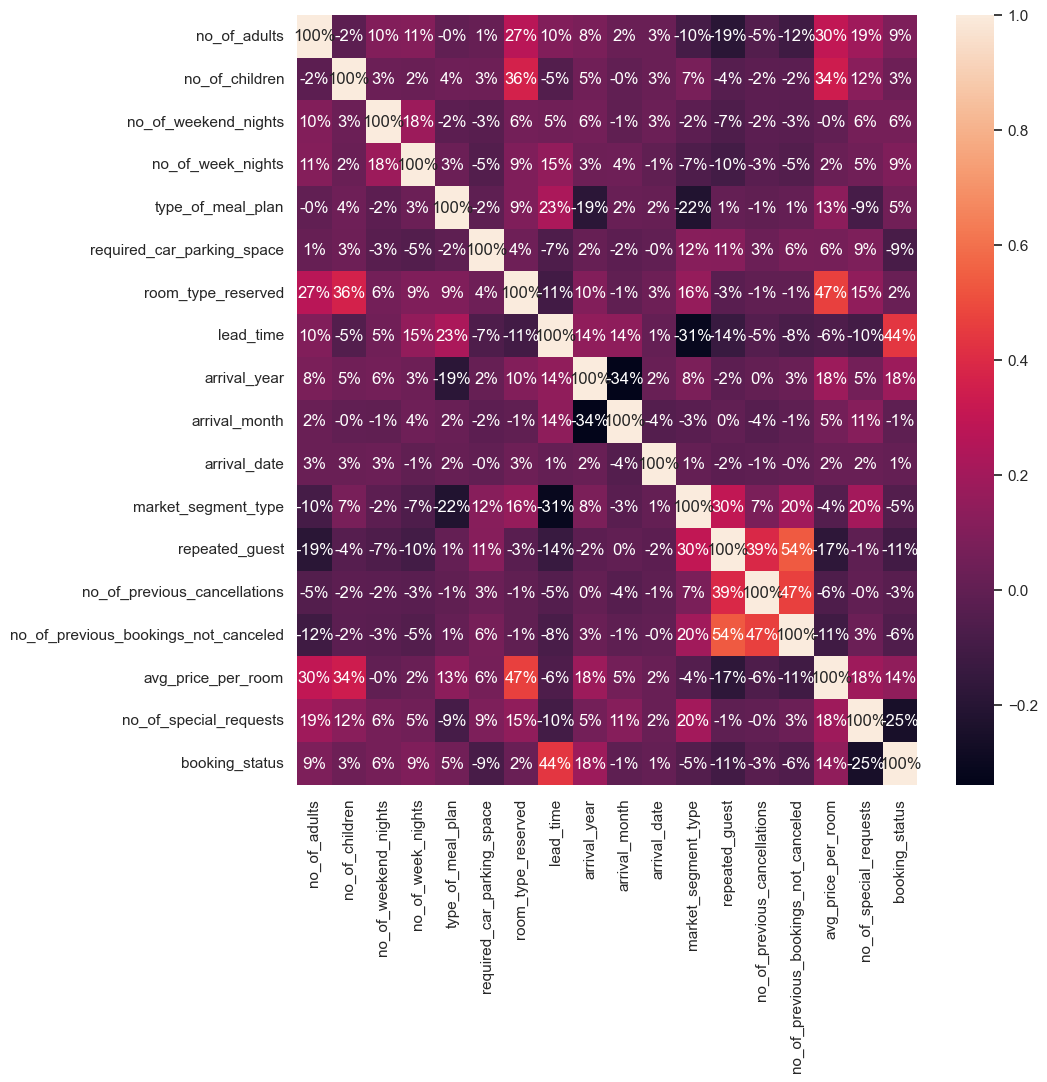

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.0%')
plt.show()

## EDA - FREQUENCY DISTRIBUTION

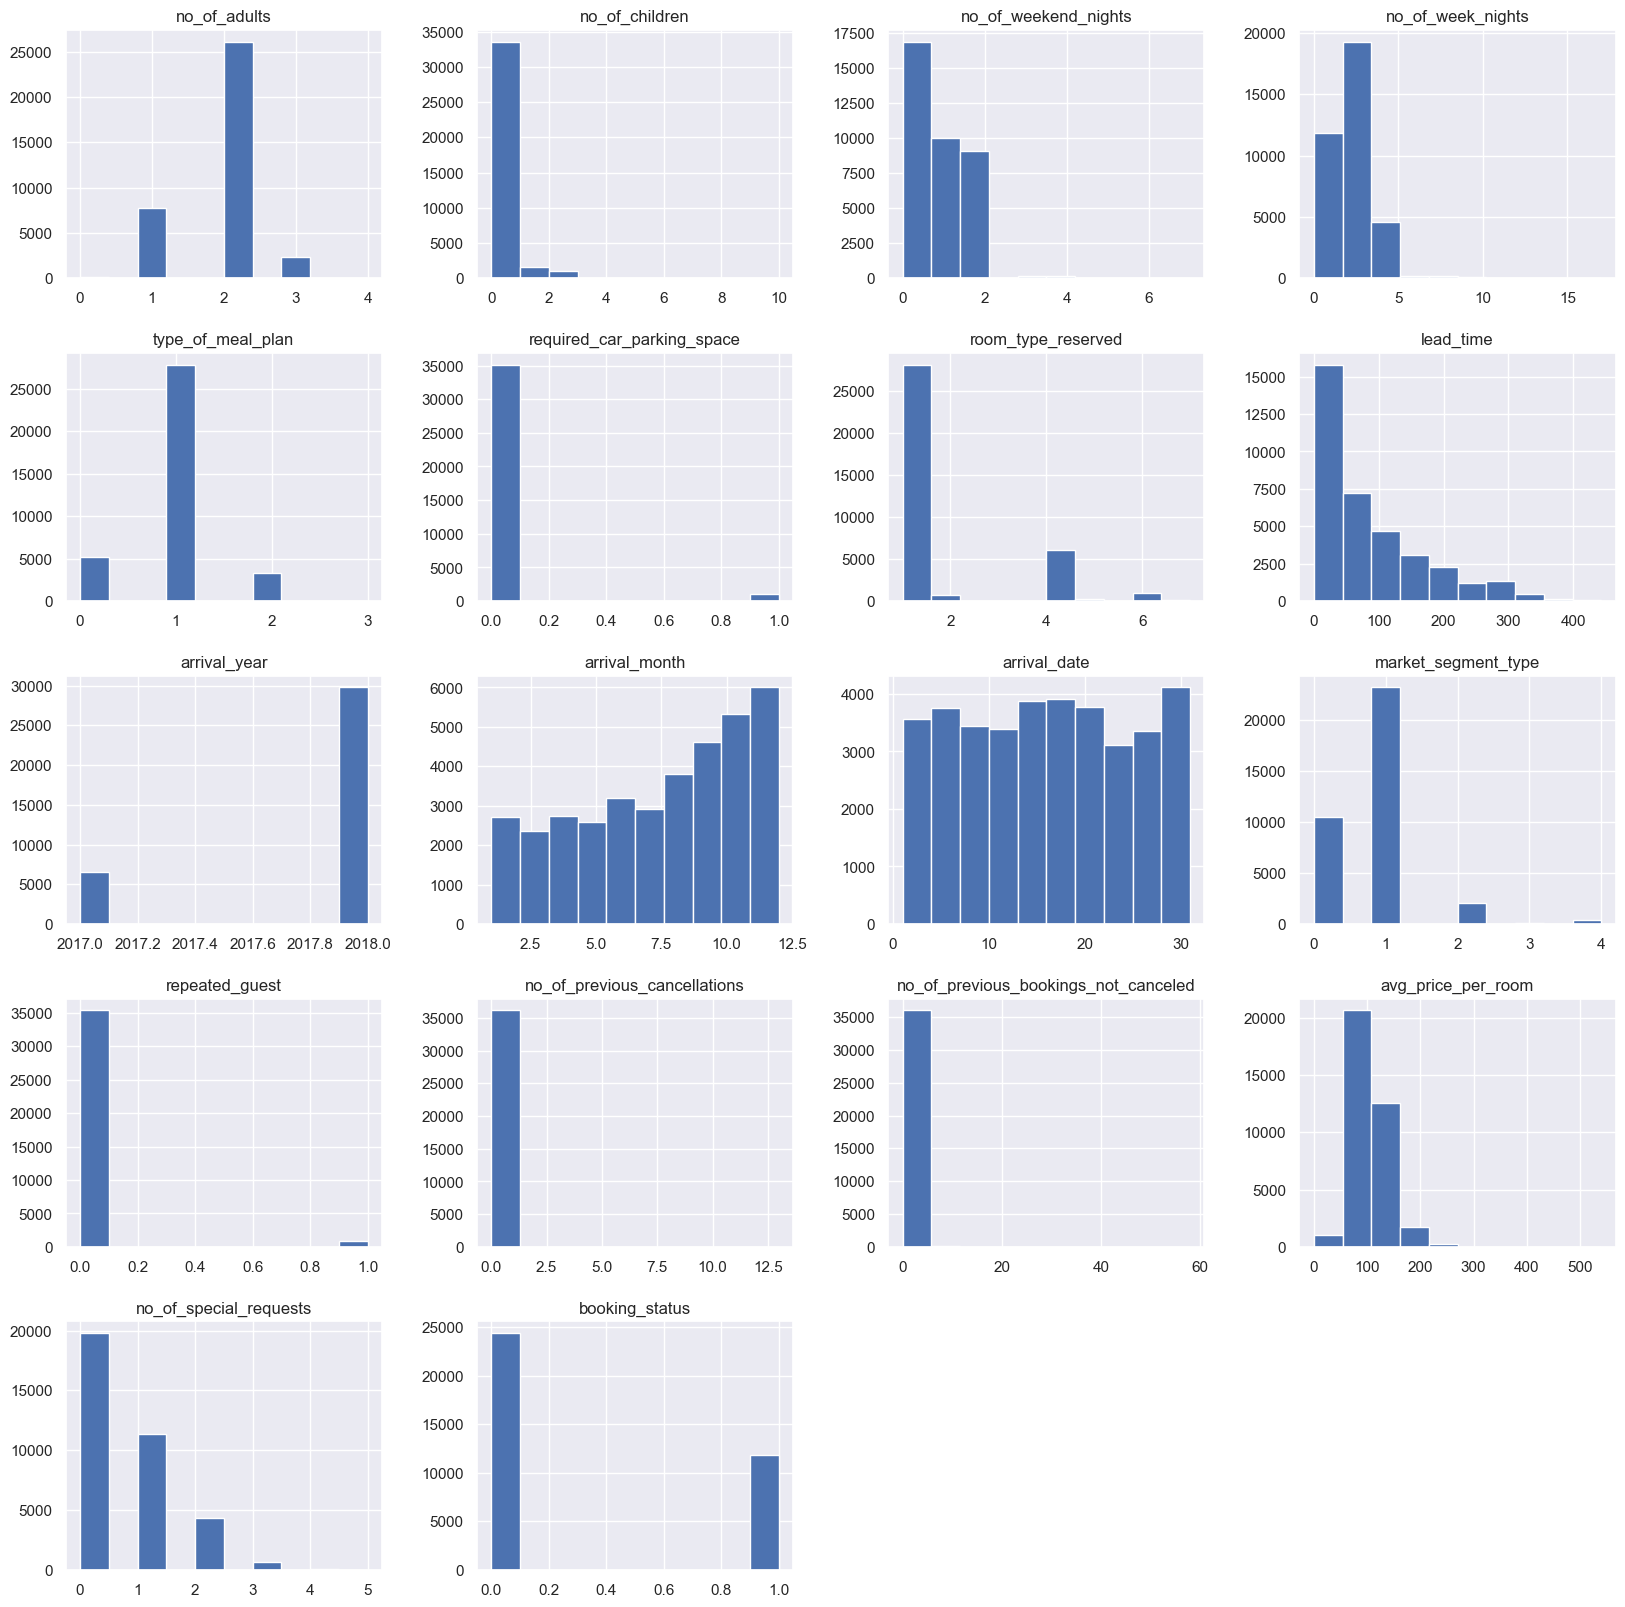

In [58]:
df.hist(figsize=(20, 20))
plt.show()

## EDA - VIOLIN PLOTS

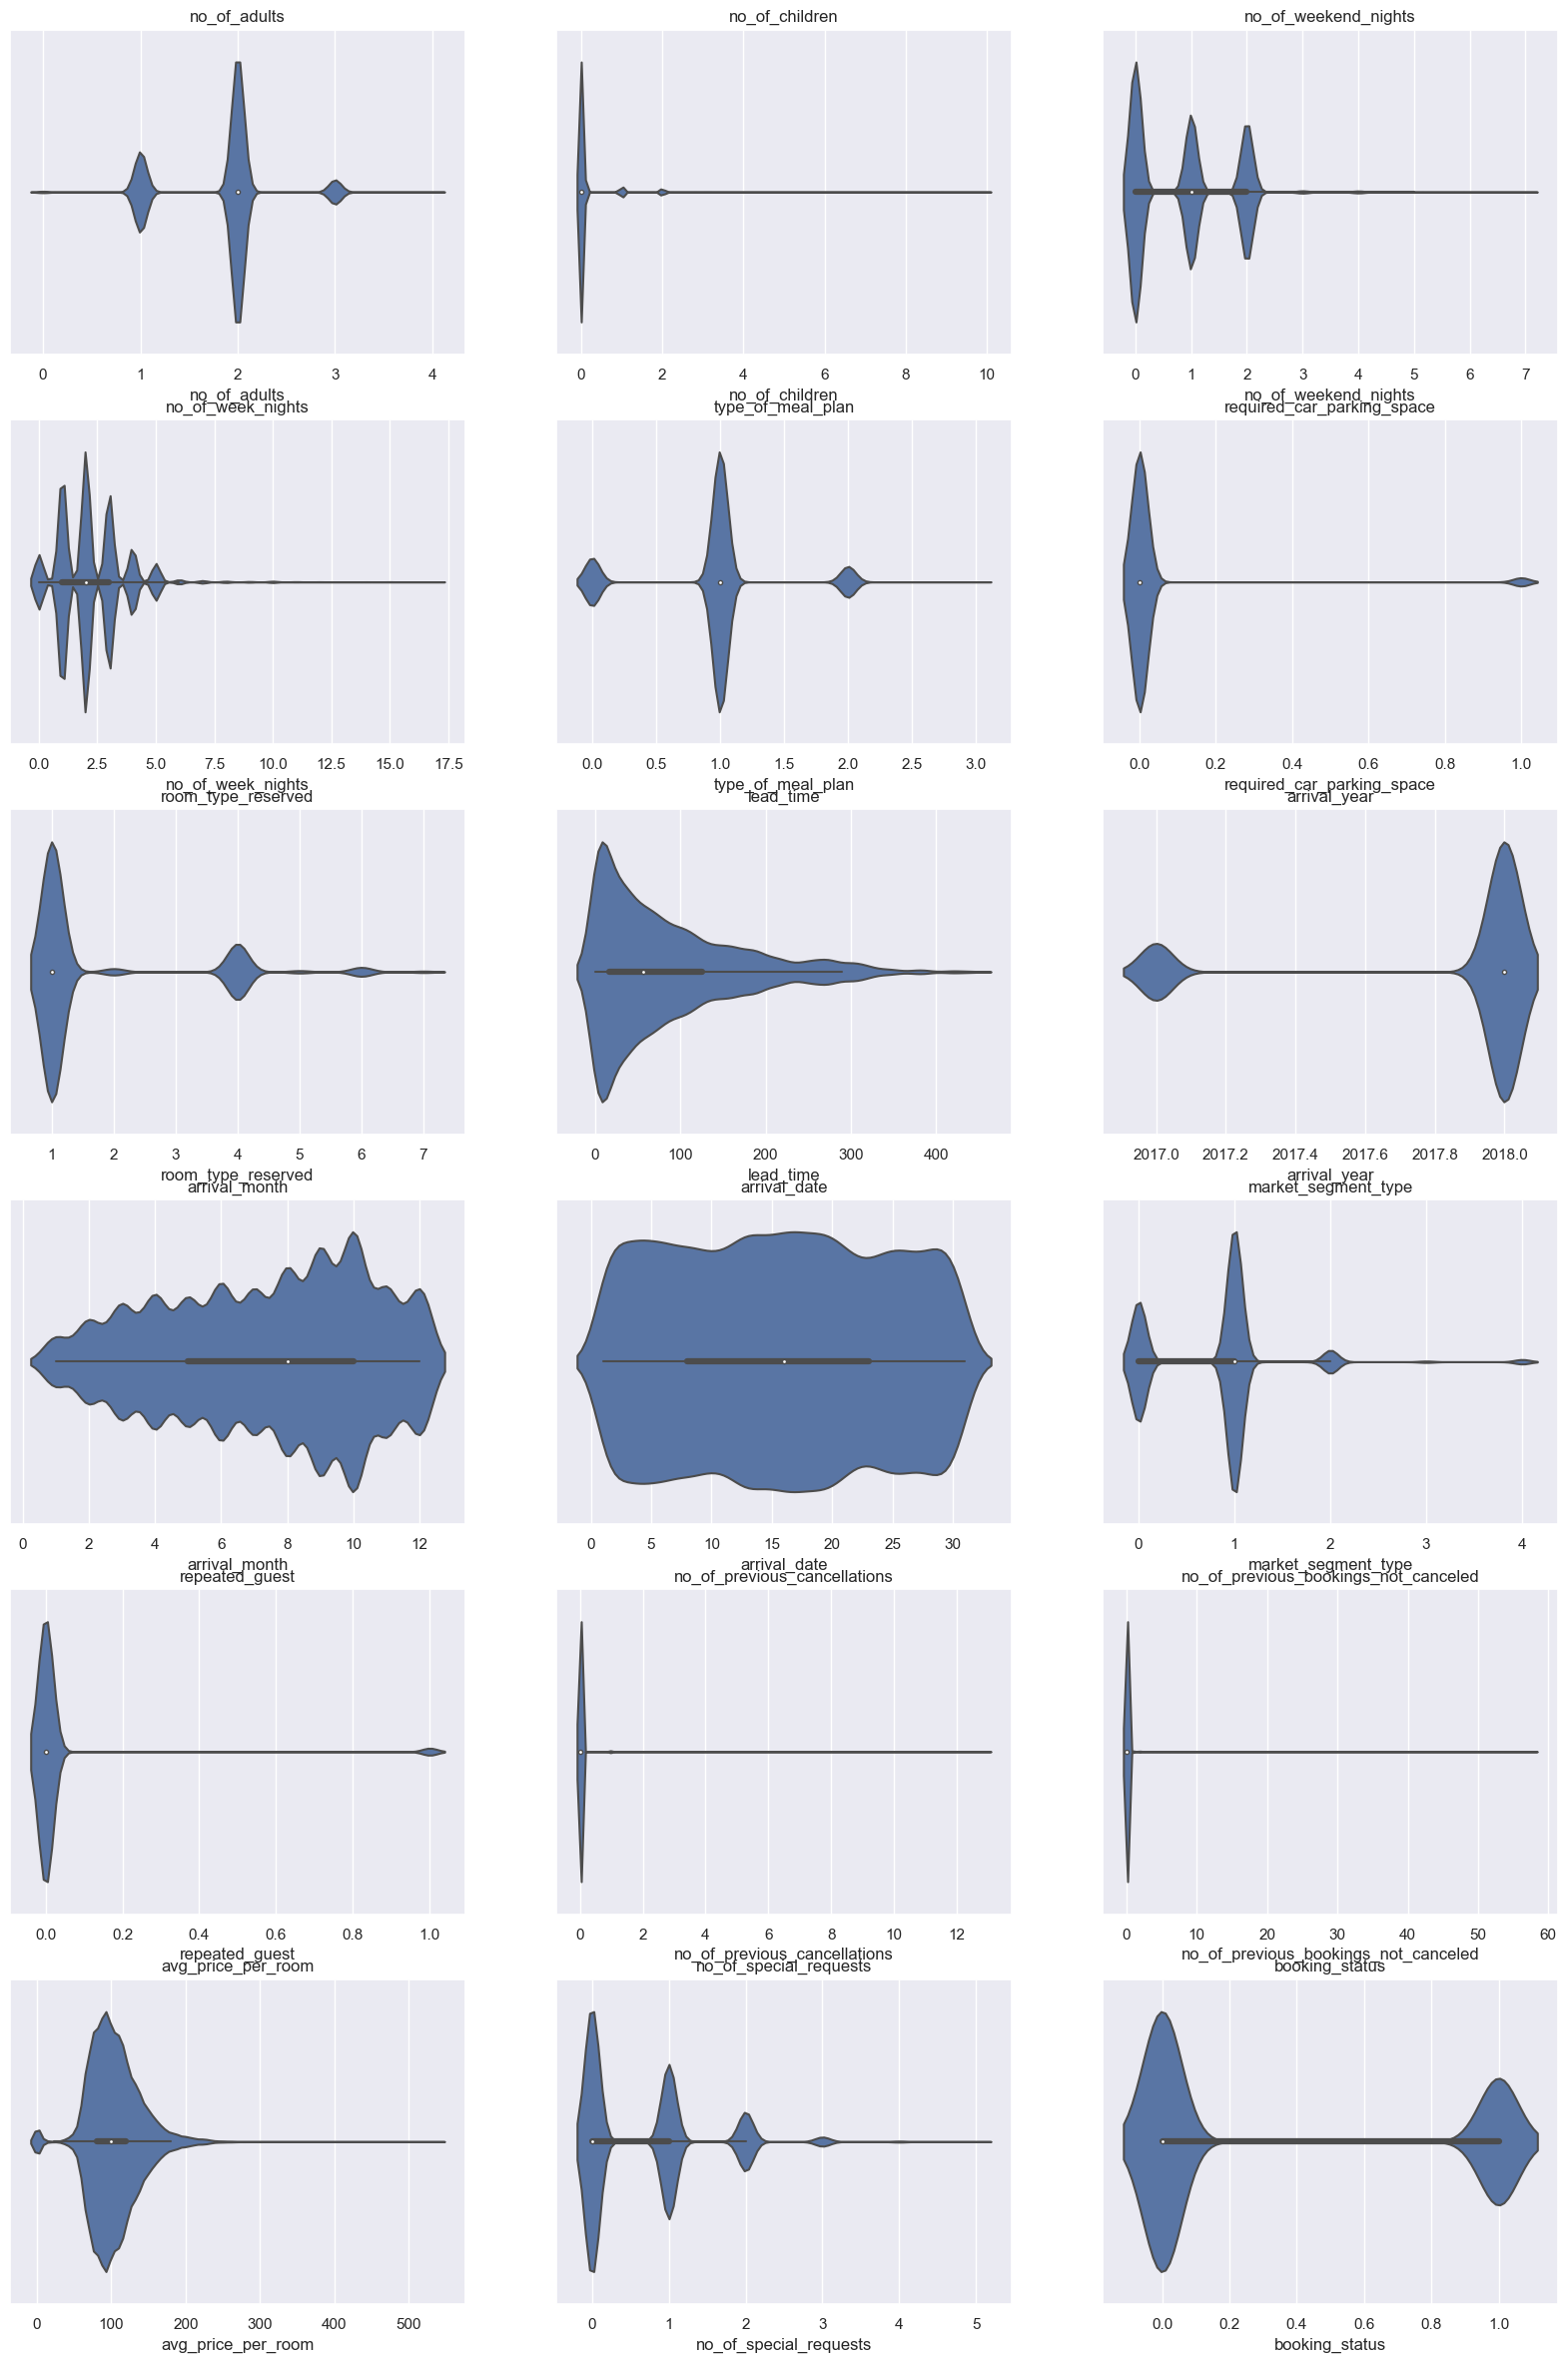

In [59]:
plt.figure(figsize=(20, 60))
for i, column in enumerate(df.columns):
    plt.subplot(12, 3, i+1)
    sns.violinplot(df[column])
    plt.title(column)
plt.show()

## Taking care of outliers

In [62]:
print("Z=SCORE BASED OUTLIER REMOVAL\n")

target_column = 'booking_status'                                             

dataframe_final = df.copy()

# Separate the target column from the feature columns
target = dataframe_final[target_column]
features = dataframe_final.drop(target_column, axis=1)

# Remove outliers using the Z-Score method
z_scores = np.abs(stats.zscore(features))
features = features[(z_scores < 3).all(axis=1)]

# Get the cleaned feature indices
cleaned_feature_indices = features.index

# Combine the target column with the cleaned feature columns
dataframe_final = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
dataframe_final.reset_index(drop=True, inplace=True)

print(f"PRE Z-SCORE OUTLIER REMOVAL ROWS: {df.shape[0]}")
print(f"POST Z-SCORE OUTLIER REMOVAL ROWS: {dataframe_final.shape[0]}")

Z=SCORE BASED OUTLIER REMOVAL

PRE Z-SCORE OUTLIER REMOVAL ROWS: 36275
POST Z-SCORE OUTLIER REMOVAL ROWS: 31385


## Splitting the Data for Training and Testing

In [63]:
# SEE TOTAL SAMPLES FOR EACH CLASS
class_count = dataframe_final["booking_status"].value_counts()
print("\nTOTAL SAMPLES FOR EACH CLASS")
print(class_count)


TOTAL SAMPLES FOR EACH CLASS
0    20760
1    10625
Name: booking_status, dtype: int64


In [64]:
X = dataframe_final.drop('booking_status', axis=1)
y = dataframe_final['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SCALE DATA

In [66]:
# Scale the training and testing data using ZScoreScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("DATA SCALED VIA Z-SCORE")

DATA SCALED VIA Z-SCORE


# USING DIFFERENT MACHINE LEARNING ALGORITHMS

## 1. Random Forest Model

In [67]:
rf = RandomForestClassifier(random_state=42)

# Define a dictionary of all the parameters to tune
params_rf = {'n_estimators': [100, 200, 300],
             'max_depth': [2, 4, 6, 8, 10],
             'min_samples_split': [2, 5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10]}

# Use grid search to test all possible combinations of parameters
grid = GridSearchCV(rf, params_rf, cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data and print the best parameters
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Update the existing model with the best parameters
rf.set_params(**grid.best_params_)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Results and Evaluation

In [71]:
best_params = grid.best_params_
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
train_precision = precision_score(y_train, rf.predict(X_train))
test_precision = precision_score(y_test, y_pred)
train_recall = recall_score(y_train, rf.predict(X_train))
test_recall = recall_score(y_test, y_pred)
train_f1_score = f1_score(y_train, rf.predict(X_train))
test_f1_score = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"BEST PARAMETERS:\n {best_params}\n")
print(f"TRAINING ACCURACY: {train_accuracy:.2%}")
print(f"TESTING ACCURACY: {test_accuracy:.2%}\n")
print(f"TRAINING PRECISION: {train_precision:.2%}")
print(f"TESTING PRECISION: {test_precision:.2%}\n")
print(f"TRAINING RECALL: {train_recall:.2%}")
print(f"TESTING RECALL: {test_recall:.2%}\n")
print(f"TRAINING F1 SCORE: {train_f1_score:.2%}")
print(f"TESTING F1 SCORE: {test_f1_score:.2%}\n")
print(f"CONFUSION MATRIX:\n {conf_matrix}")

BEST PARAMETERS:
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

TRAINING ACCURACY: 88.47%
TESTING ACCURACY: 87.18%

TRAINING PRECISION: 87.97%
TESTING PRECISION: 86.46%

TRAINING RECALL: 76.43%
TESTING RECALL: 73.55%

TRAINING F1 SCORE: 81.80%
TESTING F1 SCORE: 79.48%

CONFUSION MATRIX:
 [[5871  366]
 [ 841 2338]]


## Prediction Plots

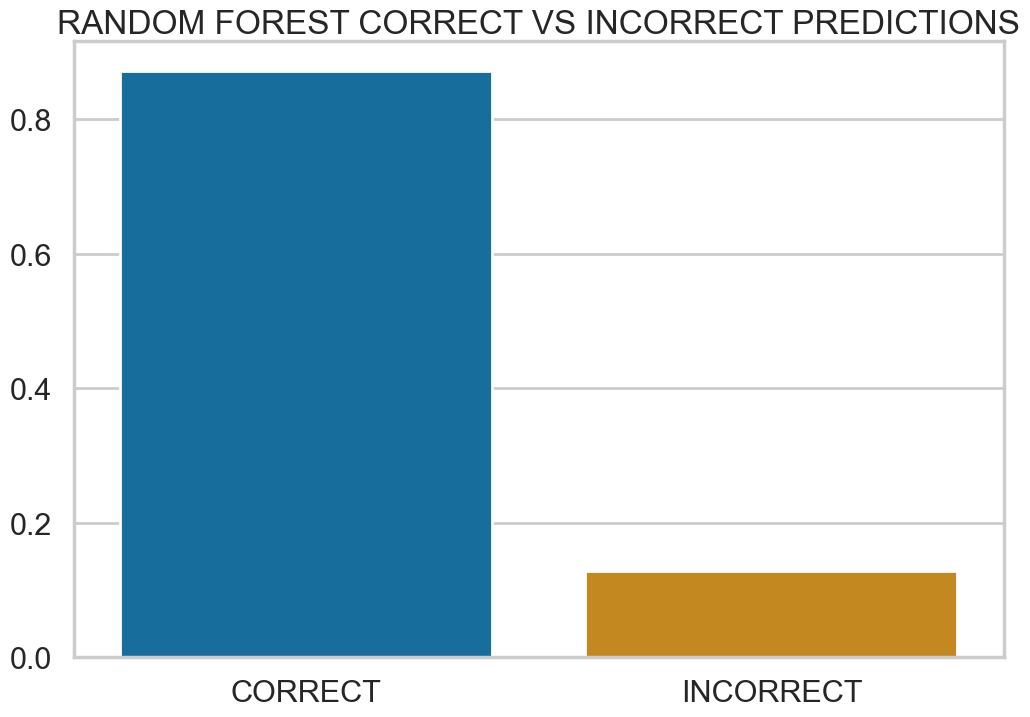

In [76]:
num_correct = accuracy_score(y_test, y_pred)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('RANDOM FOREST CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## Feature importance plot

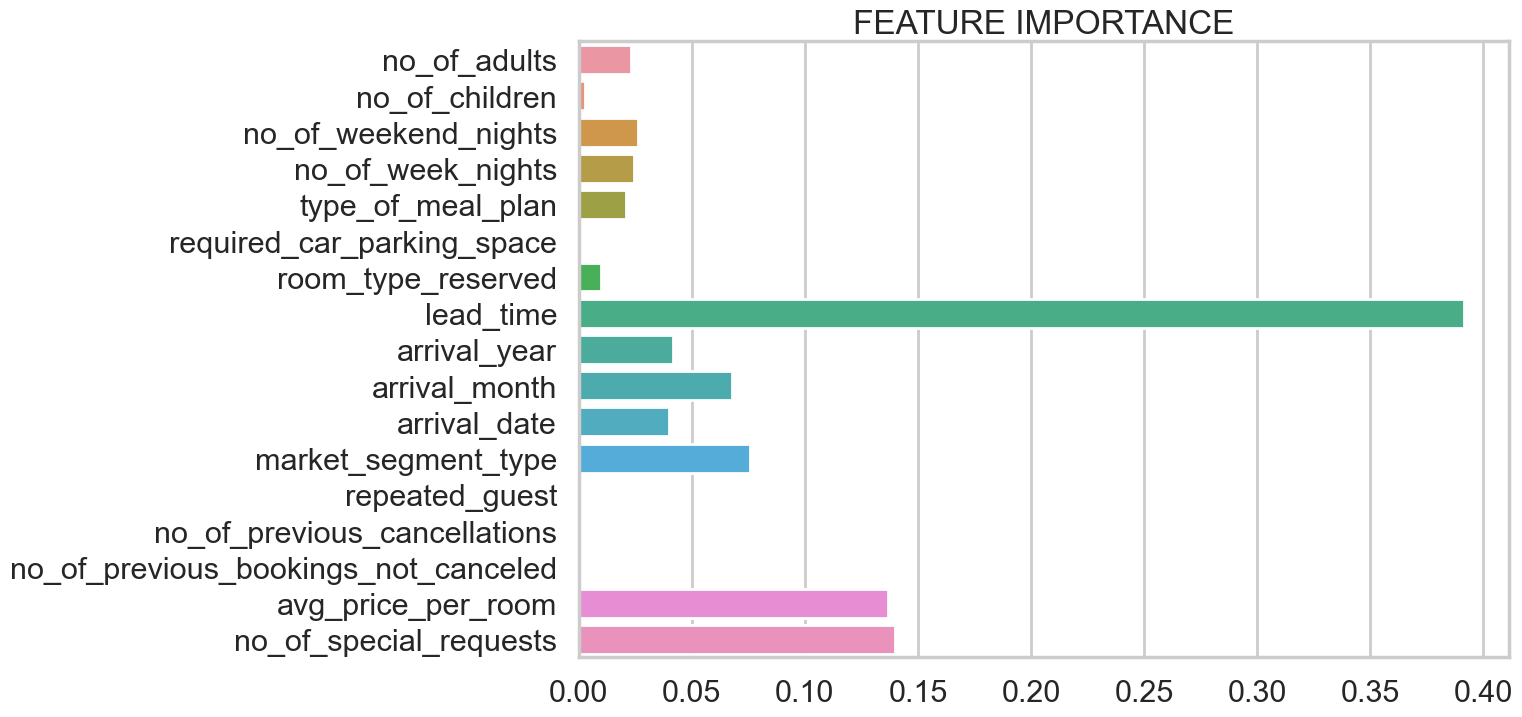

In [73]:
# Create a figure and axis objects using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the feature importance of the classifier using seaborn
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.barplot(x=rf.feature_importances_, y=X.columns, ax=ax)
ax.set_title('FEATURE IMPORTANCE')

# Display the plot
plt.show()


# 2. KNN Model 

In [74]:
neighbours_size=[3,5,10]
for i in neighbours_size:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    print("The Classifiction models for KNN methodology for k Value = ",i)
    print("The Score is -",knn.score(X_test, y_test))
    print("The Confusion Matrix is -")
    print(confusion_matrix(y_test,Y_pred))
    print("The Classification Report Matrix is -")
    print(classification_report(y_test,Y_pred))

The Classifiction models for KNN methodology for k Value =  3
The Score is - 0.8350679694137638
The Confusion Matrix is -
[[5513  724]
 [ 829 2350]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6237
           1       0.76      0.74      0.75      3179

    accuracy                           0.84      9416
   macro avg       0.82      0.81      0.81      9416
weighted avg       0.83      0.84      0.83      9416

The Classifiction models for KNN methodology for k Value =  5
The Score is - 0.8369796091758709
The Confusion Matrix is -
[[5556  681]
 [ 854 2325]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      6237
           1       0.77      0.73      0.75      3179

    accuracy                           0.84      9416
   macro avg       0.82      0.81      0.82      9416
weighted avg       0.84    

## Prediction Plot

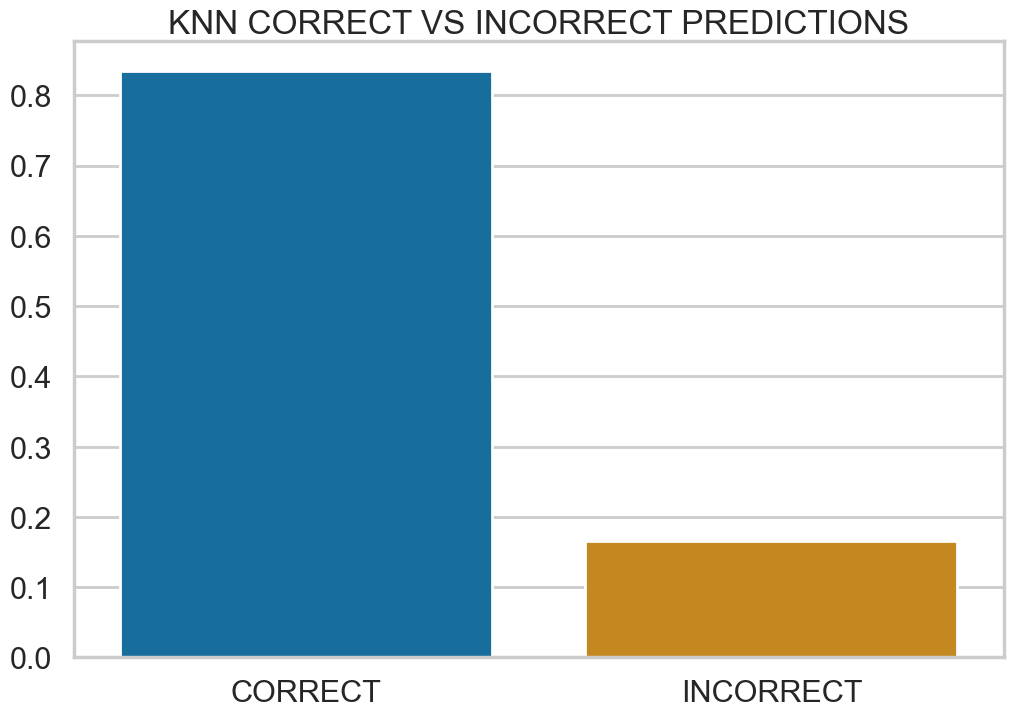

In [75]:
num_correct = accuracy_score(y_test, Y_pred)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('KNN CORRECT VS INCORRECT PREDICTIONS')
plt.show()